In [78]:
import functions
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

probabilities = list(np.arange(0,0.11,0.02))
L = 500
N = 50
vmax = 5
tmax = 500

# Plotting behaviour for different probabilities

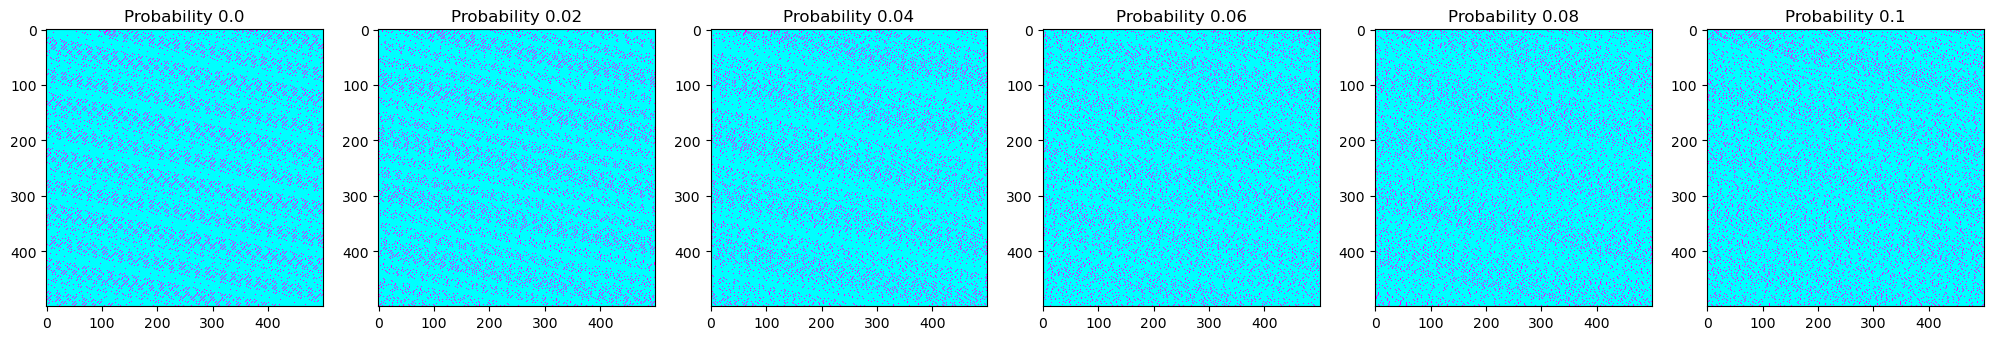

In [79]:
fig, axs = plt.subplots(1,len(probabilities), figsize = (25, 5))
for p in probabilities:
    simulation = functions.Nagel_Schreckenberg(L, N, vmax, p, tmax)[0]
    points = np.zeros((tmax, L))
    for i in range(L):
        for j in range(tmax):
            if simulation[j][i] > -1:
                points[j][i] = 1
            else:
                points[j][i] = 0
    axs[probabilities.index(p)].set_title(f'Probability {round(p,2)}')
    axs[probabilities.index(p)].imshow(points, cmap = "cool", interpolation = "nearest")
plt.show()



# Cluster distributions

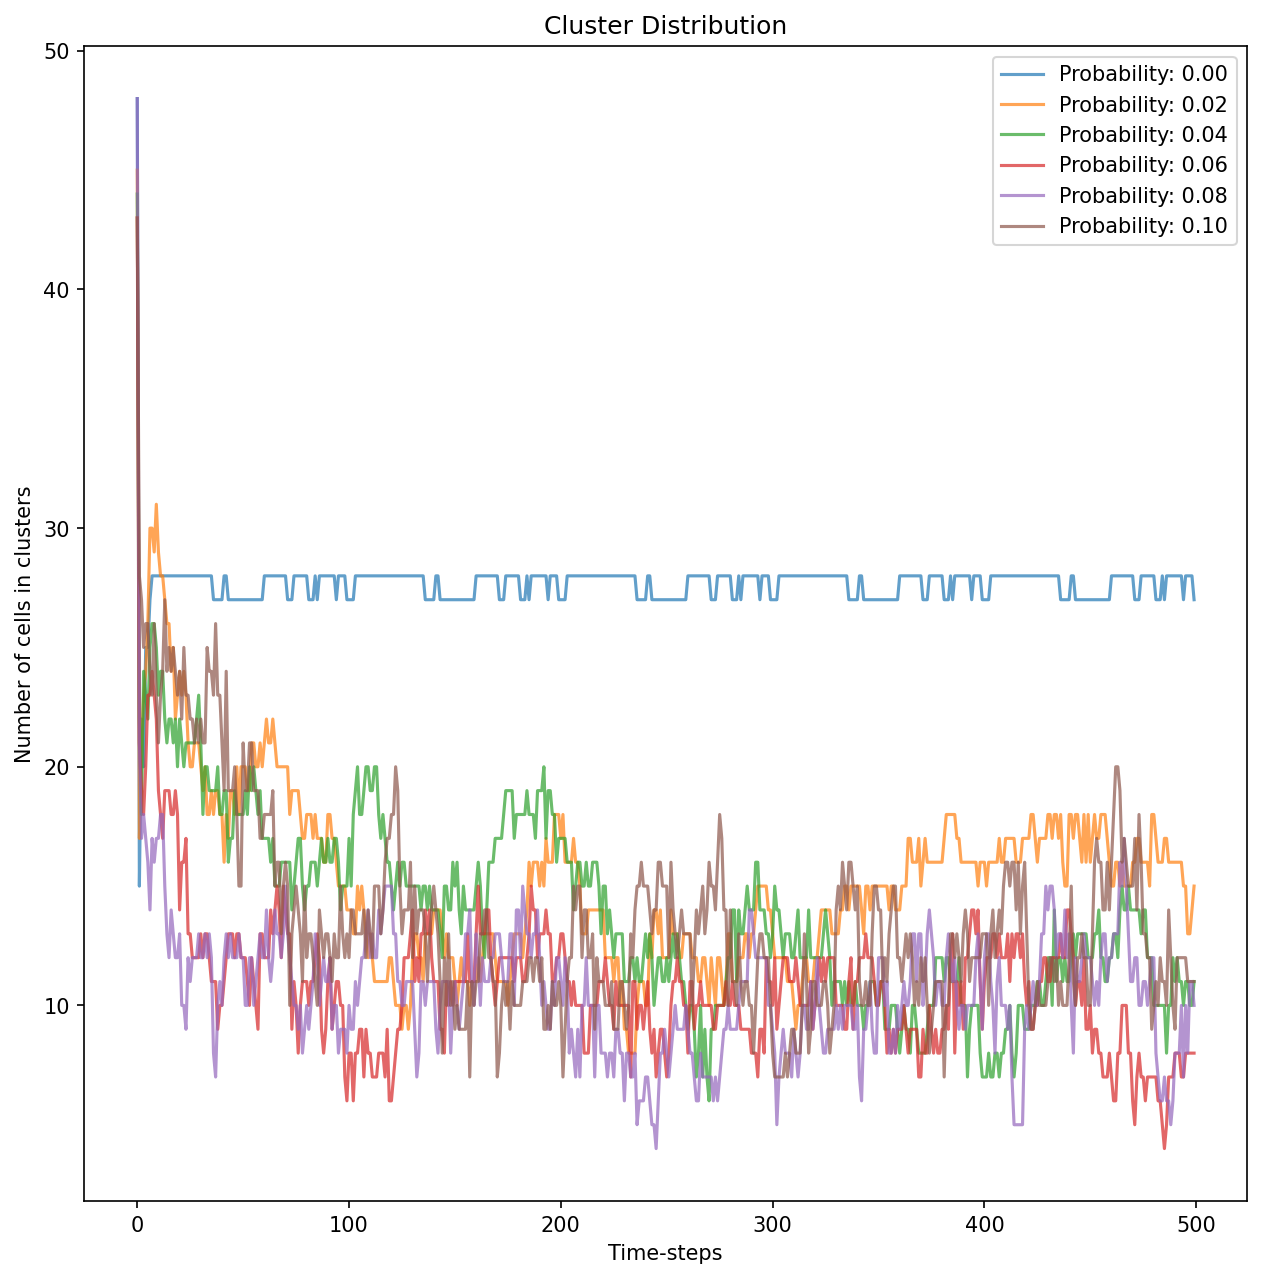

In [80]:
plt.figure(figsize=(10,10), dpi=150)

for p in probabilities:
    simulation = functions.Nagel_Schreckenberg(L, N, vmax, p, tmax)[2]
    plt.plot(range(tmax), simulation, label = f'Probability: {p:.2f}', alpha = 0.7)
    plt.xlabel('Time-steps')
    plt.ylabel('Number of cells in clusters')
    plt.title('Cluster Distribution')
    plt.legend()

plt.show()

Look at average velocity \
Look at variable braking speeds


# Average cells in cluster vs braking probability

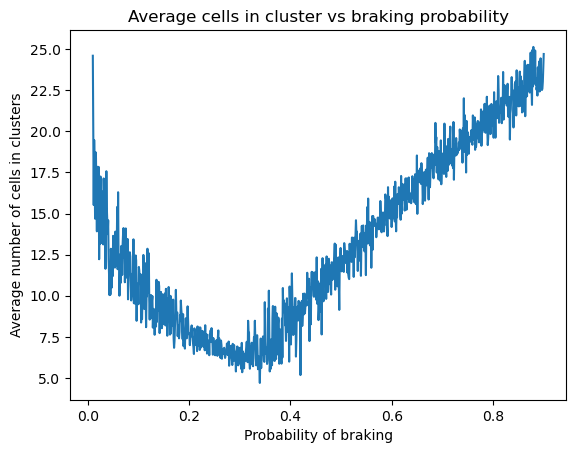

In [81]:
probs = np.linspace(0.01, 0.9, 1000)

cluster_averages = []

for p in probs:
    cluster_list = functions.Nagel_Schreckenberg(L, N, vmax, p, tmax)[2]
    cluster_average = np.mean(cluster_list)
    cluster_averages.append(cluster_average)

# Plotting
plt.plot(probs, cluster_averages)
plt.xlabel('Probability of braking')
plt.ylabel('Average number of cells in clusters')
plt.title('Average cells in cluster vs braking probability')
plt.show()